**L067_NMF.ipynb**

2024 JUN 06

Tershire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df = pd.DataFrame(iris_dataset.data, columns=columns)
iris_df["target"] = iris_dataset.target

In [4]:
display(iris_df.head(3))

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## visualization

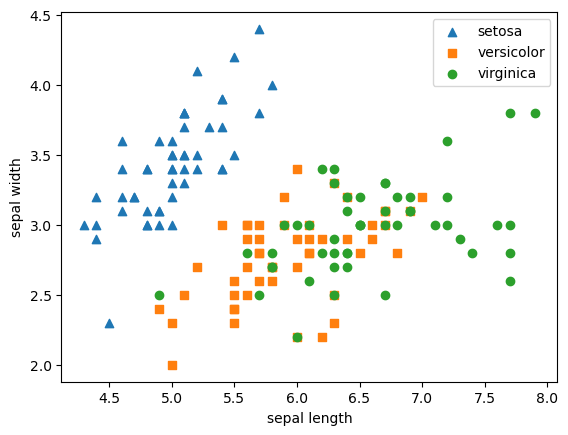

In [5]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df["target"] == i]["sepal_length"]
    y = iris_df[iris_df["target"] == i]["sepal_width"]
    plt.scatter(x, y, marker=marker, label=iris_dataset.target_names[i])

plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

# NMF

In [6]:
from sklearn.decomposition import NMF

In [7]:
nmf = NMF(n_components=2)

X_nmf = nmf.fit_transform(iris_dataset.data)

/home/tershire/anaconda3/envs/mllab/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [8]:
print(X_nmf.shape)

(150, 2)


## conversion to data frame

In [9]:
nmf_columns = ["nmf_feature_1", "nmf_feature_2"]
iris_df_nmf = pd.DataFrame(X_nmf, columns=nmf_columns)
iris_df_nmf["target"] = iris_dataset.target

In [10]:
display(iris_df_nmf.head(3))

,nmf_feature_1,nmf_feature_2,target
0,0.413562,0.104576,0
1,0.365488,0.140918,0
2,0.377855,0.101799,0


## visualization

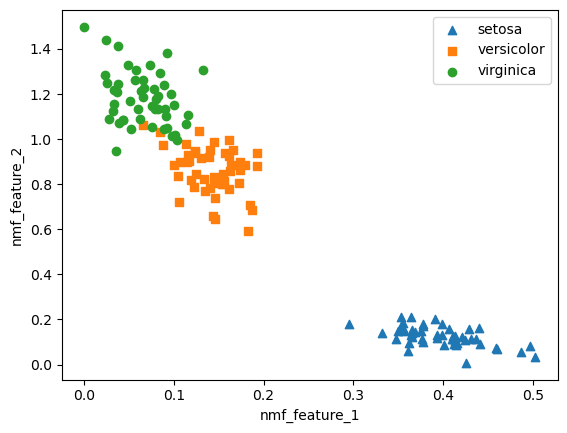

In [11]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df_nmf[iris_df_nmf["target"] == i]["nmf_feature_1"]
    y = iris_df_nmf[iris_df_nmf["target"] == i]["nmf_feature_2"]
    plt.scatter(x, y, marker=marker, label=iris_dataset.target_names[i])

plt.legend()
plt.xlabel("nmf_feature_1")
plt.ylabel("nmf_feature_2")
plt.show()

# original features vs NMF features

**random forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [13]:
classifier = RandomForestClassifier(random_state=156)

## original features

In [14]:
X, Y = iris_dataset.data, iris_dataset.target

scores = cross_val_score(classifier, X, Y, scoring="accuracy", cv=3)

print(f"cross validation accuracy scores: {scores}")
print(f"mean cross valication accuracy score: {np.mean(scores)}")

cross validation accuracy scores: [0.98 0.94 0.96]
mean cross valication accuracy score: 0.96


## NMF features

In [15]:
X_nmf = iris_df_nmf[["nmf_feature_1", "nmf_feature_2"]]

scores = cross_val_score(classifier, X_nmf, Y, scoring="accuracy", cv=3)

print(f"cross validation accuracy scores: {scores}")
print(f"mean cross valication accuracy score: {np.mean(scores)}")

cross validation accuracy scores: [0.98 0.94 0.96]
mean cross valication accuracy score: 0.96
